In [1]:
import os
import torch
from utils import *
from infer import Inferer
from cnnmodel.model import CNNModel

In [2]:
# Path to load model
PATH = os.path.join(os.getcwd(), "cls/vox_dataset_16_all_trans_rot_x2.pth")
# Load
model = torch.load(PATH)
model.eval()

CNNModel(
  (conv_layer1): Sequential(
    (0): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv3d(16, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (batch): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.15, inplace=False)
)

Loading data for dg_glyco...


100%|██████████| 102/102 [00:11<00:00,  9.16it/s]


Ground Truth: dg; Prediction Accuracy: 1.0


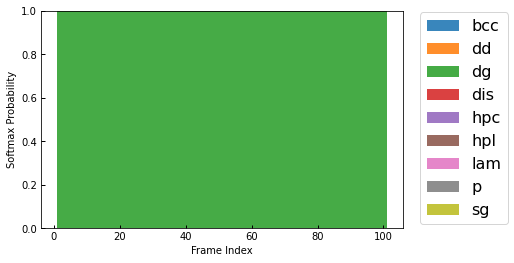

Loading data for dd_glyco...


100%|██████████| 51/51 [00:08<00:00,  6.05it/s]


Ground Truth: dd; Prediction Accuracy: 1.0


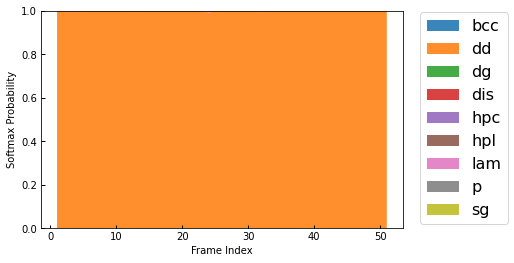

Loading data for lam_large...


100%|██████████| 101/101 [00:04<00:00, 24.95it/s]


Ground Truth: lam; Prediction Accuracy: 1.0


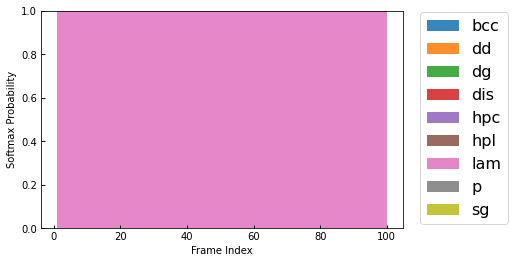

Loading data for lam_dup...


100%|██████████| 170/170 [00:06<00:00, 24.96it/s]


Ground Truth: lam; Prediction Accuracy: 0.9941176176071167


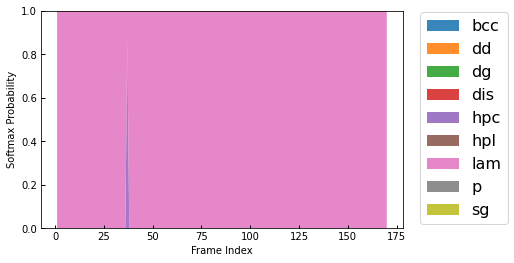

Loading data for hpc_large...


100%|██████████| 52/52 [00:01<00:00, 51.36it/s]


Ground Truth: hpc; Prediction Accuracy: 1.0


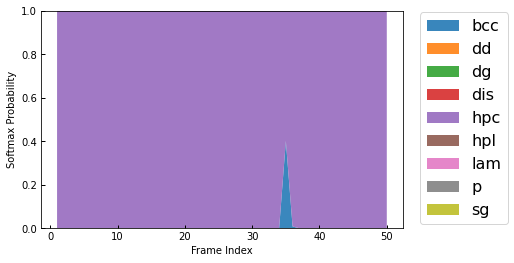

Loading data for hpc_dup...


100%|██████████| 50/50 [00:15<00:00,  3.30it/s]

Ground Truth: hpc; Prediction Accuracy: 1.0


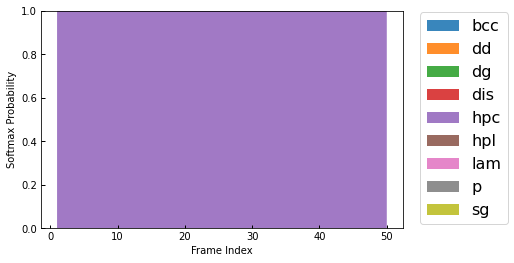

In [3]:
infer_data = {'dg_glyco': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/dg_glyco/pts', 'dg'),
              'dd_glyco': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/dd_glyco/pts', 'dd'),
              'lam_large': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/lam_large/pts', 'lam'),
              'lam_dup': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/lam_dup/pts', 'lam'),
              'hpc_large': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/hpc_large/pts', 'hpc'),
              'hpc_dup': 
              ('/mnt/ssd1/donny/test_pn/pointnet.pytorch/point_clouds/sim_pts/hpc_dup/pts', 'hpc')
             }

inferer = Inferer()
for piece, (data_path, truth) in infer_data.items():
    print(f'Loading data for {piece}...')
    scores, conf_mat = inferer.infer(model, data_path, truth)  
    inferer.plot_softmax_scores(scores)